<a href="https://colab.research.google.com/github/Ranjan234/Bank-Customer-Data-Prep/blob/main/BANK_CHURN_ANALYST_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OBJECTIVE -1: JOIN & QA THE DATA
- import/Open both tables in the "Bank_Churn_Messy.xlsx" file
- Use a left join to join "Account_info" to "Customer_info" using the "Customer_Id" column
- Check for and remove duplicate rwos & columns

In [1]:
import pandas as pd

In [2]:
churn_cust_info = pd.read_excel("/content/Bank_Churn_Messy.xlsx")

In [3]:
churn_cust_info.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [4]:
churn_acct_info = pd.read_excel("/content/Bank_Churn_Messy.xlsx", sheet_name = 1)

churn_acct_info.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


In [5]:
# Use a left join to join "Account_info",to "customer_info" using the "customer_id" column.

churn_df = churn_cust_info.merge(churn_acct_info, how = "left", on = "CustomerId")

churn_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,3,No,1
10000,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10001,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10002,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0


In [6]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure_x         10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  Tenure_y         10004 non-null  int64  
 12  IsActiveMember   10004 non-null  object 
 13  Exited           10004 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [7]:
# Drop duplicate column and rename the remaining Tenure column
churn_df = churn_df.drop("Tenure_y", axis=1).rename({"Tenure_x": "Tenure"}, axis=1)


In [8]:
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0


In [9]:
churn_df.duplicated(keep = False)

,0
0,True
1,True
2,False
3,False
4,False
...,...
9999,False
10000,True
10001,True
10002,True


In [10]:
churn_df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,No,1
10000,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,No,0
10001,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,No,0
10002,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,No,0
10003,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,No,0


In [11]:
churn_df = churn_df.drop_duplicates()

In [12]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9997 non-null   float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  object 
 8   Balance          10000 non-null  object 
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1.1+ MB


# OBJECTIVE- 2: CLEAN THE DATA
1. Check the data types for each column and make any necessary fixes
2. Replace missing values in categorical columns with "MISSING", and missing values in numeric columns with the median
3. Profile the numeric columns in the data. are there any extreme and non-sencical values? if so, impute them with the median of the column.  

In [13]:
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,Yes,0


In [14]:
churn_df["EstimatedSalary"] = churn_df["EstimatedSalary"].str.replace("€", "").astype("float")

In [15]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9997 non-null   float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Balance          10000 non-null  object 
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.1+ MB


In [16]:
churn_df["Balance"] = churn_df["Balance"].str.replace("€", "").astype("float")
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9997 non-null   float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 1.1+ MB


In [17]:
# Replace missing values in categorical columns with "MISSING", and missing values in numeric columns with the median.
churn_df[churn_df.isna().any(axis = 1) == True]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,NaN,574,Germany,Female,NaN,3,-999999.0,141349.43,1,Yes,Yes,0
122,15580203,NaN,674,Spain,Male,NaN,6,-999999.0,120193.42,1,No,No,0
9390,15756954,NaN,538,France,Female,NaN,2,-999999.0,0.00,1,Yes,Yes,0


In [18]:
churn_df=churn_df.fillna(value={"Surname":"MISSING", "Age":churn_df["Age"].median()})

In [19]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 1.1+ MB


In [20]:
churn_df.iloc[[28,121,9389]]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,MISSING,574,Germany,Female,37.0,3,-999999.0,141349.43,1,Yes,Yes,0
122,15580203,MISSING,674,Spain,Male,37.0,6,-999999.0,120193.42,1,No,No,0
9390,15756954,MISSING,538,France,Female,37.0,2,-999999.0,0.00,1,Yes,Yes,0


In [21]:
#Profile the numeric columns in the data. are there any extreme and non-sencical values? if so, impute them with the median of the column.
churn_df.describe()


,CustomerId,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921500,5.012800,99762.195289,76485.889288,1.530200,0.203700
std,7.193619e+04,96.653299,10.487552,2.892174,60583.863580,62397.405202,0.581654,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,-999999.000000,0.000000,1.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,50910.677500,0.000000,1.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,100191.725000,97198.540000,1.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,149388.247500,127644.240000,2.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,199992.480000,250898.090000,4.000000,1.000000


In [22]:
churn_df["EstimatedSalary"] = churn_df["EstimatedSalary"].replace(-999999, churn_df["EstimatedSalary"].median())

In [23]:
churn_df.describe()

,CustomerId,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921500,5.012800,100092.252506,76485.889288,1.530200,0.203700
std,7.193619e+04,96.653299,10.487552,2.892174,57510.146401,62397.405202,0.581654,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,11.580000,0.000000,1.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,51002.110000,0.000000,1.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,100196.062500,97198.540000,1.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,149388.247500,127644.240000,2.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,199992.480000,250898.090000,4.000000,1.000000


In [24]:
# Check the values in hte "Geography" column and combine any variations in country names to a single values per country.
churn_df["Geography"].value_counts()

,count
Geography,
Germany,2509
Spain,2477
France,1741
French,1655
FRA,1618


In [25]:
import numpy as np

churn_df["Geography"] = np.where(churn_df["Geography"].isin(["FRA","French","France"]),"France", churn_df["Geography"])


In [26]:
churn_df["Geography"].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


# OBJECTIVE- 3: Explore the data
- Build a bar chart displaying the count of churners (Exited=1) vs. non-churners (Exited=0)

- Explore the categorical variables vs. the target, and look at the percentage of Churners by “Geography” and “Gender”

- Build box plots for each numeric field, broken out by churners vs. non-churners.

- Build histograms for each numeric field, broken out by churners vs. non-churners

<Axes: xlabel='Exited'>

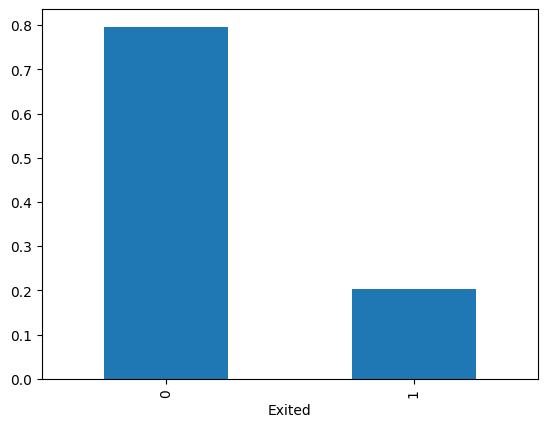

In [29]:
# Build a bar chart displaying the count of churners (Exited=1) vs. non-churners (Exited=0)
churn_df['Exited'].value_counts(normalize = True).plot.bar()

<Axes: xlabel='Geography', ylabel='count'>

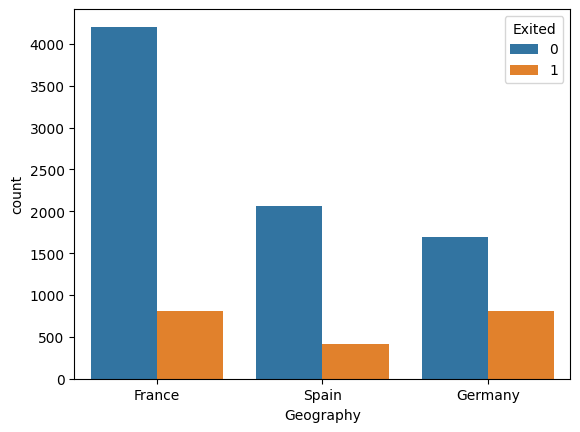

In [34]:
#Explore the categorical variables vs. the target, and look at the percentage of Churners by “Geography” and “Gender”
import seaborn as sns
sns.countplot(x = "Geography", hue = "Exited", data = churn_df)

In [35]:
churn_df.select_dtypes("object")

,Surname,Geography,Gender,HasCrCard,IsActiveMember
0,Hargrave,France,Female,Yes,Yes
2,Hill,Spain,Female,Yes,Yes
3,Onio,France,Female,No,No
4,Boni,France,Female,No,No
5,Mitchell,Spain,Female,Yes,Yes
...,...,...,...,...,...
9996,Obijiaku,France,Male,No,No
9997,Johnstone,France,Male,Yes,Yes
9998,Liu,France,Female,Yes,Yes
9999,Sabbatini,Germany,Male,No,No


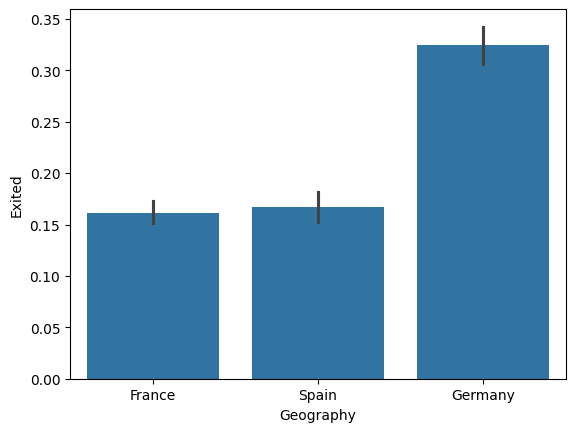

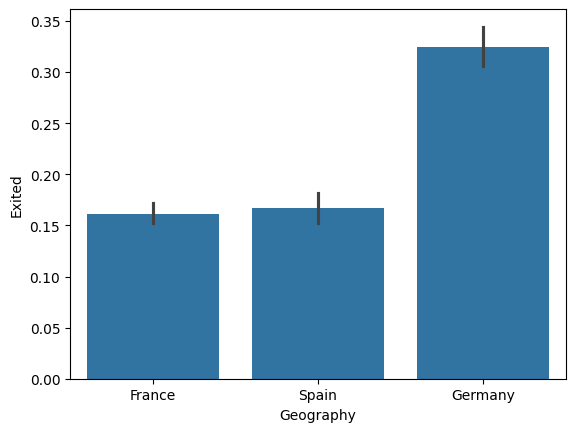

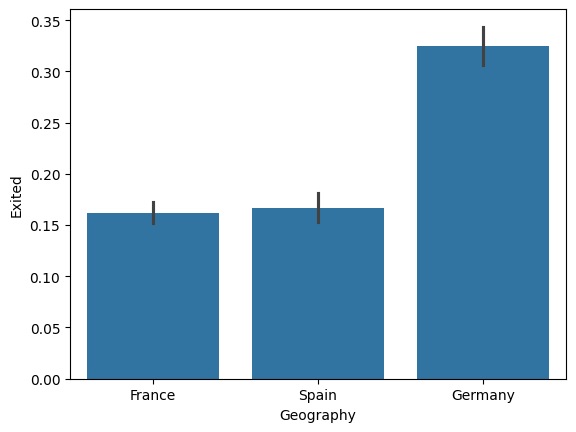

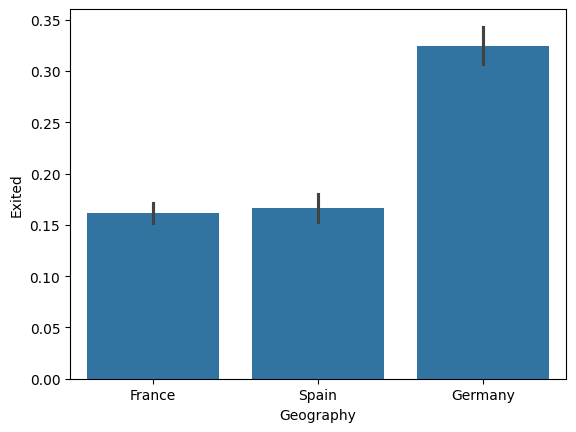

In [36]:
import matplotlib.pyplot as plt

for col in churn_df.drop("Surname", axis =1).select_dtypes("object"):

     sns.barplot( data = churn_df, x = "Geography", y = "Exited")
     plt.show()

<Axes: ylabel='Age'>

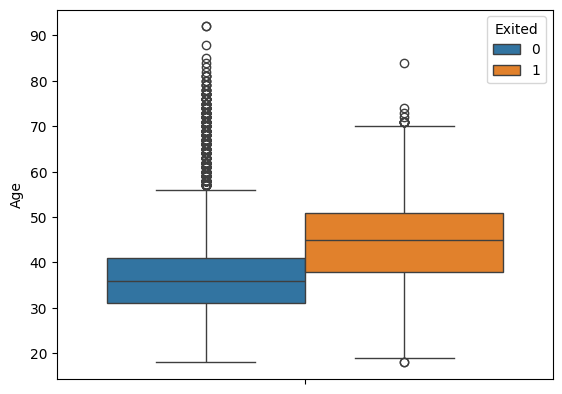

In [40]:
# Build box plots for each numeric field, broken out by churners vs. non-churners.


sns.boxplot(data = churn_df, y="Age", hue = "Exited")


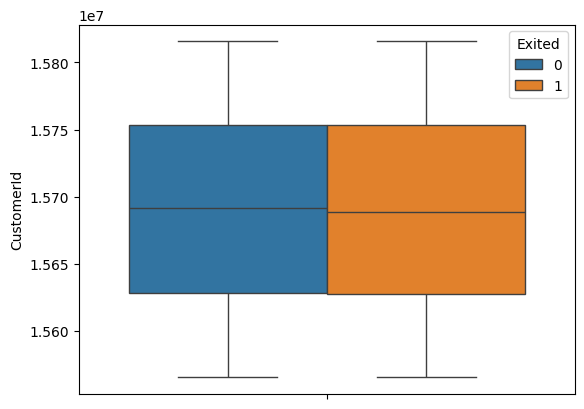

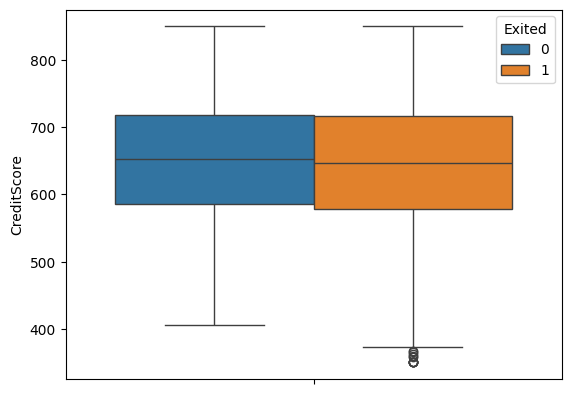

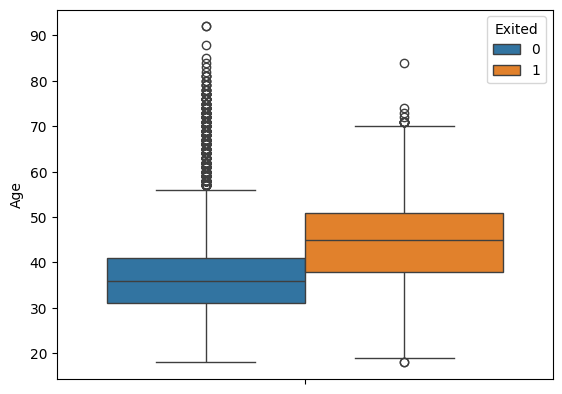

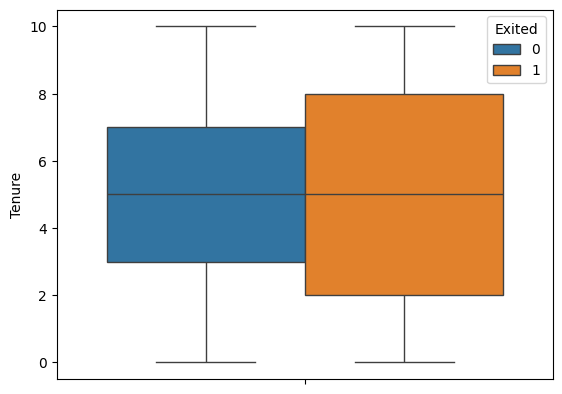

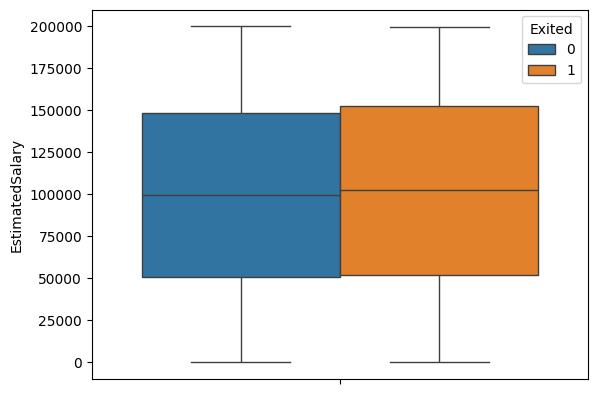

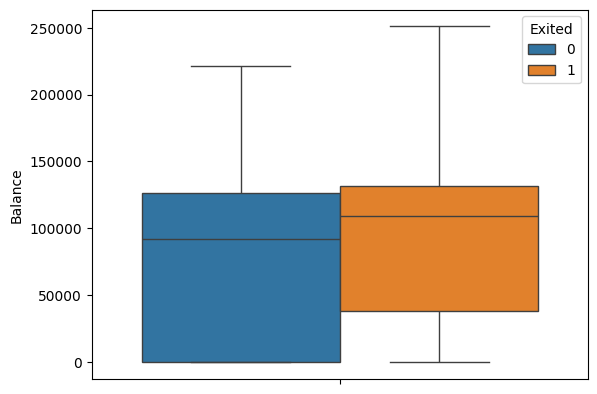

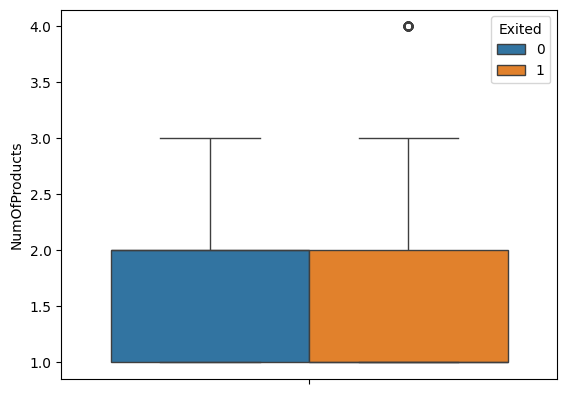

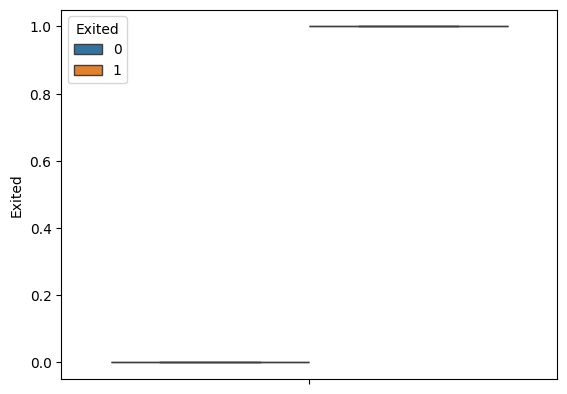

In [42]:
for col in churn_df.drop("Surname", axis =1).select_dtypes("number"):
  sns.boxplot(data = churn_df, y=col, hue = "Exited")
  plt.show()

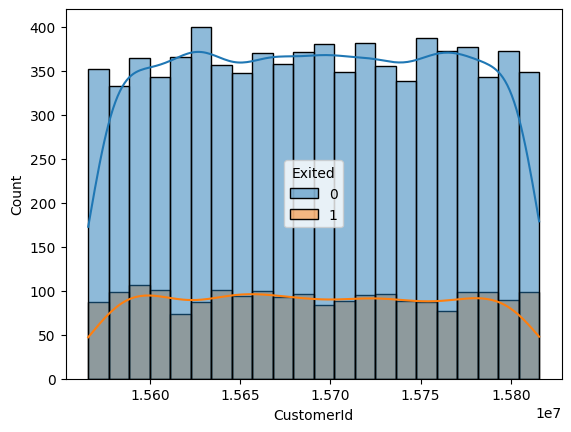

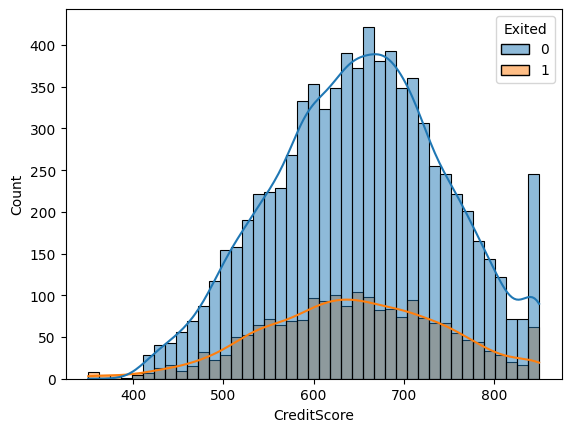

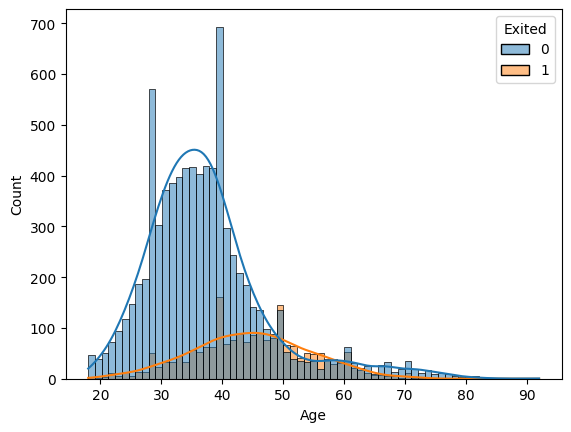

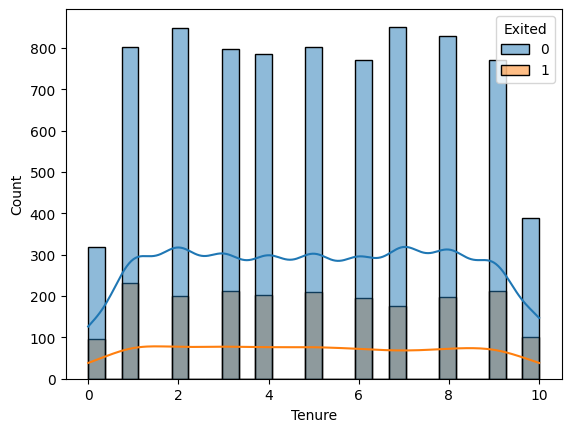

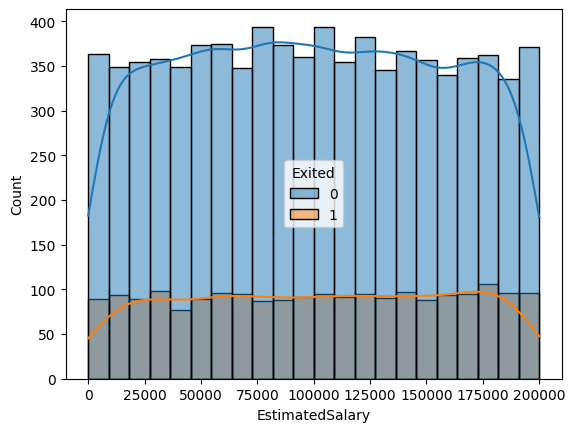

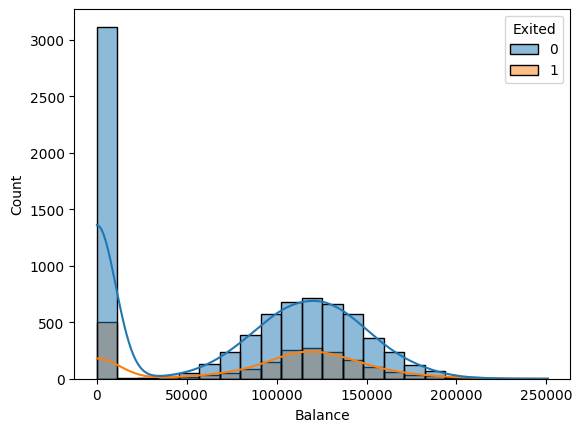

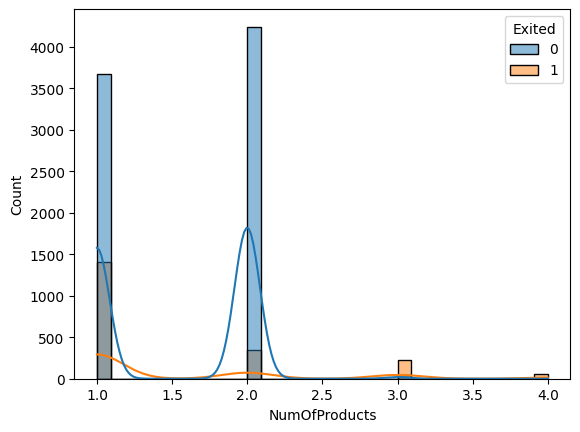

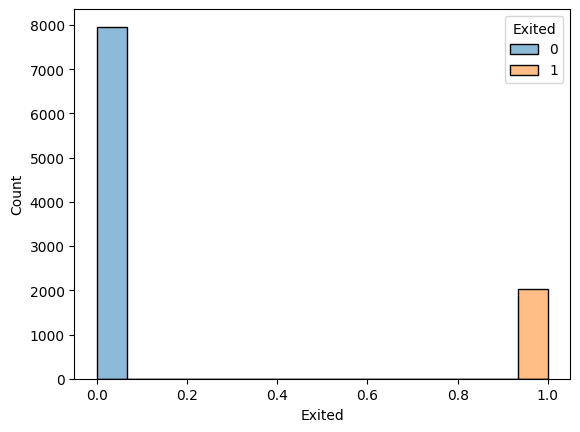

In [44]:
#Build histograms for each numeric field, broken out by churners vs. non-churners

for col in churn_df.drop("Surname", axis =1).select_dtypes("number"):
  sns.histplot(data = churn_df, x=col, hue = "Exited", kde=True)
  plt.show()

# OBJECTIVE- 4: Prepare the data for modeling

- Create a new dataset that excludes any columns that aren’t be suitable for modeling

- Create dummy variables for categorical fields

- Create a new “balance_v_income” feature, which divides a customer’s bank balance by their estimated salary, then visualize that feature vs. churn status

In [45]:
#Create a new dataset that excludes any columns that aren’t be suitable for modeling
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,France,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,15701354,Boni,699,France,Female,39.0,1,93826.63,0.00,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0


In [46]:
modeling_df = churn_df.drop(["CustomerId", "Surname"], axis = 1)

In [47]:
modeling_df

,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,502,France,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,699,France,Female,39.0,1,93826.63,0.00,2,No,No,0
5,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39.0,5,96270.64,0.00,2,No,No,0
9997,516,France,Male,35.0,10,101699.77,57369.61,1,Yes,Yes,0
9998,709,France,Female,36.0,7,42085.58,0.00,1,Yes,Yes,1
9999,772,Germany,Male,42.0,3,92888.52,75075.31,2,No,No,1


In [49]:
#Create dummy variables for categorical fields

modeling_df = pd.get_dummies(modeling_df, drop_first = True)

,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes
0,619,42.0,2,101348.88,0.00,1,1,False,False,False,True,True
2,608,41.0,1,112542.58,83807.86,1,0,False,True,False,True,True
3,502,42.0,8,113931.57,159660.80,3,1,False,False,False,False,False
4,699,39.0,1,93826.63,0.00,2,0,False,False,False,False,False
5,850,43.0,2,79084.10,125510.82,1,0,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,771,39.0,5,96270.64,0.00,2,0,False,False,True,False,False
9997,516,35.0,10,101699.77,57369.61,1,0,False,False,True,True,True
9998,709,36.0,7,42085.58,0.00,1,1,False,False,False,True,True
9999,772,42.0,3,92888.52,75075.31,2,1,True,False,True,False,False


In [50]:
#Create a new “balance_v_income” feature, which divides a customer’s bank balance by their estimated salary, then visualize that feature vs. churn status

modeling_df["Balance_v_sal"]= modeling_df["Balance"]/modeling_df["EstimatedSalary"]

modeling_df.head()

,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Balance_v_sal
0,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1,0.000000
2,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0,0.744677
3,502,France,Female,42.0,8,113931.57,159660.80,3,No,No,1,1.401375
4,699,France,Female,39.0,1,93826.63,0.00,2,No,No,0,0.000000
5,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0,1.587055


<Axes: ylabel='Balance_v_sal'>

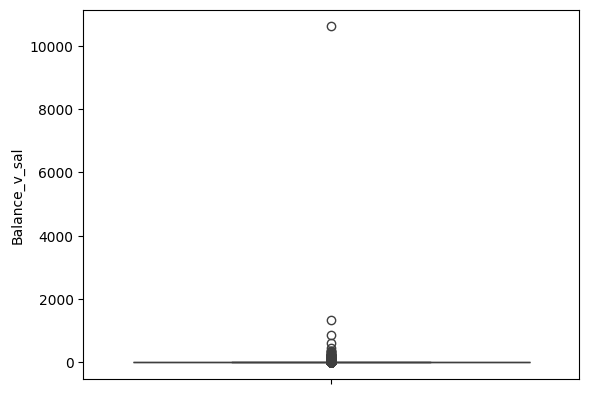

In [52]:
sns.boxplot(data = modeling_df,  y = "Balance_v_sal")

<Axes: ylabel='Balance_v_sal'>

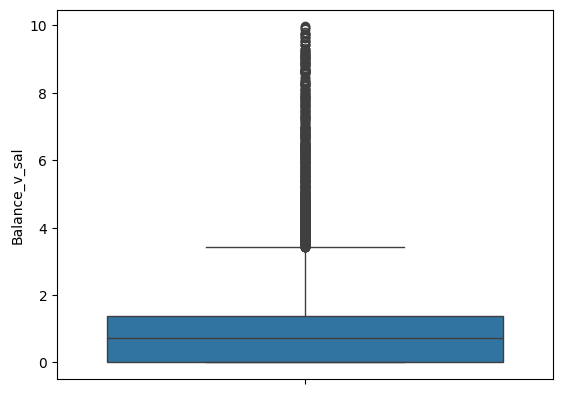

In [58]:
sns.boxplot(data = modeling_df.query("Balance_v_sal < 10"), y = "Balance_v_sal")

In [53]:
modeling_df.describe()

,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited,Balance_v_sal
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921500,5.012800,100092.252506,76485.889288,1.530200,0.203700,3.878703
std,96.653299,10.487552,2.892174,57510.146401,62397.405202,0.581654,0.402769,108.337260
min,350.000000,18.000000,0.000000,11.580000,0.000000,1.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,51002.110000,0.000000,1.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,100196.062500,97198.540000,1.000000,0.000000,0.747002
75%,718.000000,44.000000,7.000000,149388.247500,127644.240000,2.000000,0.000000,1.514022
max,850.000000,92.000000,10.000000,199992.480000,250898.090000,4.000000,1.000000,10614.655440


<Axes: ylabel='Balance_v_sal'>

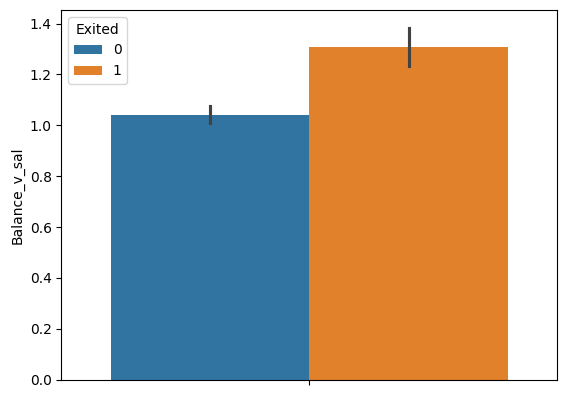

In [59]:
sns.barplot(data = modeling_df.query("Balance_v_sal < 10"), y = "Balance_v_sal", hue="Exited")